In [1]:
from pandas_datareader import data as pdr
from sklearn import preprocessing
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import copy

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# 指數比較 -- 抓取數據
start = datetime.datetime(2010,1,4)
end = datetime.datetime(2019,12,31)

 
TWII="^TWII"
SP500 = "^GSPC"
Rus3000="^RUA"

TWII_Data = web.DataReader(TWII, 'yahoo', start, end)
SP500_Data = web.DataReader(SP500, 'yahoo', start, end)
Rus3000_Data = pdr.DataReader( Rus3000, 'yahoo', start, end)

data = [TWII_Data, SP500_Data, Rus3000_Data]


In [3]:
# 數據標準化
z_datas = []
for i in data:
    ma_scaler = preprocessing.MaxAbsScaler()
    tem = ma_scaler.fit_transform(i)
    new = pd.DataFrame(tem, columns = i.columns, index = i.index)
    # normalize data start from 0
    new['Close'] = new['Close']-new['Close']['2010-01-04']
    z_datas.append(new)


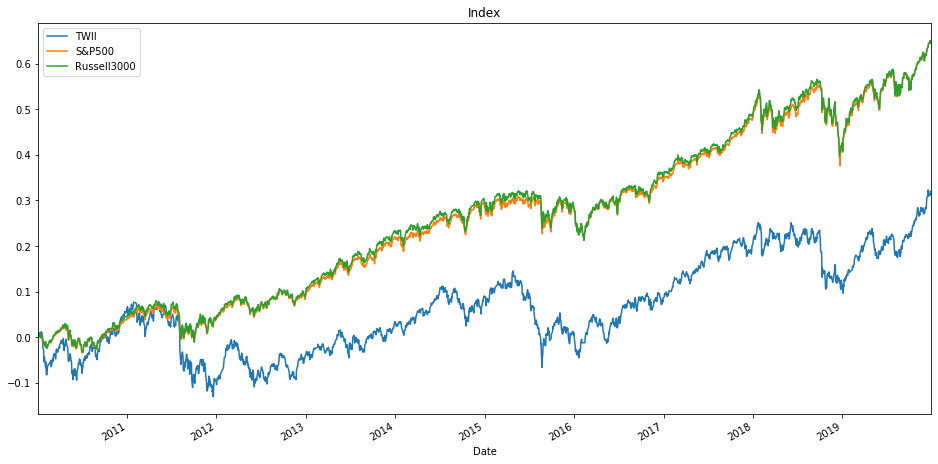

In [4]:
# 指數比較 -- 圖
z_datas[0]['Close'].plot(label='TWII',figsize=(16,8),title='Index')
z_datas[1]['Close'].plot(label='S&P500',figsize=(16,8))
z_datas[2]['Close'].plot(label='Russell3000',figsize=(16,8))
plt.legend()


In [5]:
# ETF 比較 -- 抓取數據
TW0050 = "0050.TW"
SPY = "SPY"

etfCodes = [TW0050, SPY]
etfDatas = []
for i in etfCodes:
    tem = pdr.DataReader(i, 'yahoo', start, end)
    etfDatas.append(tem)

In [6]:
# 在發放股利當天，將股利加回去股價之中
# cauculate 0050 dividend 
dividendData = pd.read_excel('dividend.xlsx', index_col=0) 
dataList = dividendData.index
for i in dataList:
    if pd.isnull(i) is not True:
        etfDatas[0]["Close"][i:] += dividendData["TWdividend"][i]

        
# cauculate SPY dividend
dividendData = pd.read_excel('dividend.xlsx', index_col=2) 
dataList = dividendData.index
for i in dataList:
    if pd.isnull(i) is not True:
        etfDatas[1]["Close"][i:] += dividendData["SPdividend"][i]


In [7]:
# 圖表數據處理
n = etfDatas[1]["Close"][0]/etfDatas[0]["Close"][0]
imgEtfDatas = copy.deepcopy(etfDatas)
imgEtfDatas[0]["Close"] = (etfDatas[0]["Close"] - etfDatas[0]["Close"][0])*n
imgEtfDatas[1]["Close"] = etfDatas[1]["Close"] - etfDatas[1]["Close"][0]

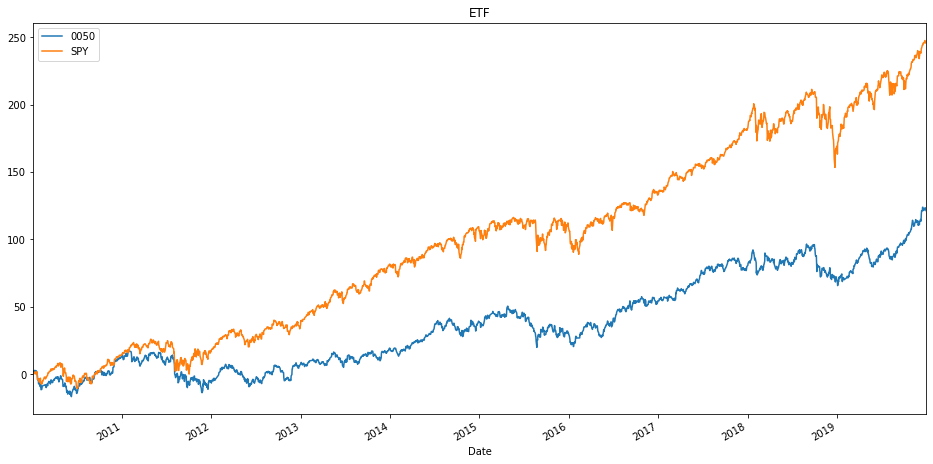

In [8]:
# ETF 比較 -- 圖
imgEtfDatas[0]['Close'].plot(label='0050',figsize=(16,8),title='ETF')
imgEtfDatas[1]['Close'].plot(label='SPY',figsize=(16,8))
plt.legend()

In [9]:
# 報酬率計算
firstDayOfYear = datetime.datetime(2010,1,4)
lastDayOfYear = datetime.datetime(2019,12,31)
TW0050Return = (etfDatas[0]["Close"][lastDayOfYear] - etfDatas[0]["Close"][firstDayOfYear]) / etfDatas[0]["Close"][firstDayOfYear]
SPYReturn = (etfDatas[1]["Close"][lastDayOfYear] - etfDatas[1]["Close"][firstDayOfYear]) / etfDatas[1]["Close"][firstDayOfYear]
returnInfo = {
    'TW0050': {
        '2010 - 2019 Return': round(TW0050Return*100,2),
    },
    'SPY': {
        '2010 - 2019 Return': round(SPYReturn*100,2),
    }
}
df = pd.DataFrame(data=returnInfo) 
df


,TW0050,SPY
2010 - 2019 Return,107.08,217.38


In [10]:
# case1 / up: COV-19 
bullishStart = datetime.datetime(2020,4,15)
bullishEnd = datetime.datetime(2020,12,11)

TWII_bullishData = web.DataReader(TWII, 'yahoo', bullishStart, bullishEnd)
SP500_bullishData = web.DataReader(SP500, 'yahoo', bullishStart, bullishEnd)

TWII_bullishReturn = (TWII_bullishData["Close"][bullishEnd] - TWII_bullishData["Close"][bullishStart]) / TWII_bullishData["Close"][bullishStart]
SP500_bullishReturn = (SP500_bullishData["Close"][bullishEnd] - SP500_bullishData["Close"][bullishStart]) / SP500_bullishData["Close"][bullishStart]


In [11]:
# case1 / drop: COV-19 
COVdropStart = datetime.datetime(2020,1,2)
COVdropEnd = datetime.datetime(2020,3,23)

TWII_COVData = web.DataReader(TWII, 'yahoo', COVdropStart, COVdropEnd)
SP500_COVData = web.DataReader(SP500, 'yahoo', COVdropStart, COVdropEnd)
Rus3000_COVData = pdr.DataReader( Rus3000, 'yahoo', COVdropStart, COVdropEnd)
TWII_COVReturn = (TWII_COVData["Close"][COVdropEnd] - TWII_COVData["Close"][COVdropStart]) / TWII_COVData["Close"][COVdropStart]
SP500_COVReturn = (SP500_COVData["Close"][COVdropEnd] - SP500_COVData["Close"][COVdropStart]) / SP500_COVData["Close"][COVdropStart]
Rus3000_COVReturn = (Rus3000_COVData["Close"][COVdropEnd] - Rus3000_COVData["Close"][COVdropStart]) / Rus3000_COVData["Close"][COVdropStart]

In [12]:
# case2 / drop: Financial crisis
FCdropStart = datetime.datetime(2008,2,1)
FCdropEnd = datetime.datetime(2009,4,2)

TWII_FCData = web.DataReader(TWII, 'yahoo', FCdropStart, FCdropEnd)
SP500_FCData = web.DataReader(SP500, 'yahoo', FCdropStart, FCdropEnd)
Rus3000_FCData = pdr.DataReader( Rus3000, 'yahoo', FCdropStart, FCdropEnd)

TWII_FCReturn = (TWII_FCData["Close"][FCdropEnd] - TWII_FCData["Close"][FCdropStart]) / TWII_FCData["Close"][FCdropStart]
SP500_FCReturn = (SP500_FCData["Close"][FCdropEnd] - SP500_FCData["Close"][FCdropStart]) / SP500_FCData["Close"][FCdropStart]
Rus3000_FCReturn = (Rus3000_FCData["Close"][FCdropEnd] - Rus3000_FCData["Close"][FCdropStart]) / Rus3000_FCData["Close"][FCdropStart]

In [13]:
# return in special cases
returnInfo = {
    'TWII': {
        "2020 Bullish Market": round(TWII_bullishReturn*100,2),
        "2020 Covid-19": round(TWII_COVReturn*100,2),
        "2008 Financial Crisis": round(TWII_FCReturn*100,2),
    },
    'S&P500': {
        "2020 Bullish Market": round(SP500_bullishReturn*100,2),
        "2020 Covid-19": round(SP500_COVReturn*100,2),
        "2008 Financial Crisis": round(SP500_FCReturn*100,2),
    } 
}
df = pd.DataFrame(data=returnInfo) 
df.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,TWII,S&P500
2020 Bullish Market,36.51,31.62
2020 Covid-19,-26.53,-31.32
2008 Financial Crisis,-28.67,-40.21
